## PassManager and Unroller

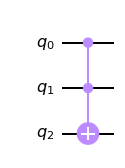

In [2]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

circ = QuantumCircuit(3)
circ.ccx(0, 1, 2)
circ.draw(output='mpl')

### Unroller and PassManager

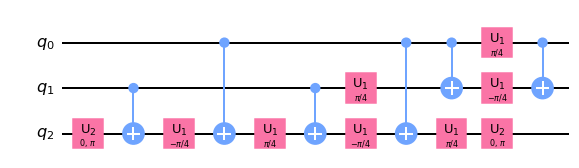

In [3]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(circ)
new_circ.draw(output='mpl')

### Transpiler Passes

In [4]:
#list

from qiskit.transpiler import passes
[pass_ for pass_ in dir(passes) if pass_[0].isupper()]

['ALAPSchedule',
 'ASAPSchedule',
 'ApplyLayout',
 'BarrierBeforeFinalMeasurements',
 'BasicSwap',
 'BasisTranslator',
 'CSPLayout',
 'CXCancellation',
 'CXDirection',
 'CheckCXDirection',
 'CheckGateDirection',
 'CheckMap',
 'Collect2qBlocks',
 'CommutationAnalysis',
 'CommutativeCancellation',
 'ConsolidateBlocks',
 'CountOps',
 'CountOpsLongestPath',
 'CrosstalkAdaptiveSchedule',
 'DAGFixedPoint',
 'DAGLongestPath',
 'Decompose',
 'DenseLayout',
 'Depth',
 'EnlargeWithAncilla',
 'Error',
 'FixedPoint',
 'FullAncillaAllocation',
 'GateDirection',
 'HoareOptimizer',
 'Layout2qDistance',
 'LayoutTransformation',
 'LookaheadSwap',
 'MergeAdjacentBarriers',
 'NoiseAdaptiveLayout',
 'NumTensorFactors',
 'Optimize1qGates',
 'Optimize1qGatesDecomposition',
 'OptimizeSwapBeforeMeasure',
 'RZXCalibrationBuilder',
 'RemoveDiagonalGatesBeforeMeasure',
 'RemoveFinalMeasurements',
 'RemoveResetInZeroState',
 'ResourceEstimation',
 'SabreLayout',
 'SabreSwap',
 'SetLayout',
 'Size',
 'StochasticSw

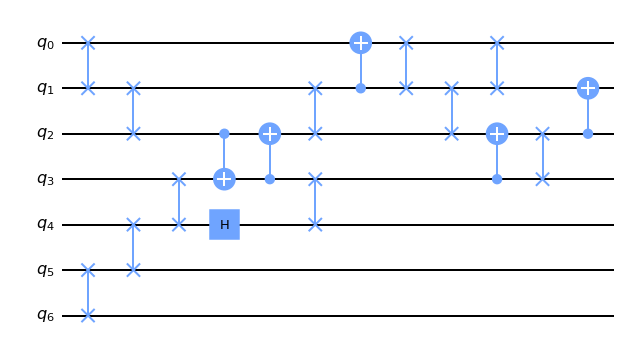

In [6]:
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

circuit = QuantumCircuit(7)
circuit.h(3)
circuit.cx(0, 6)
circuit.cx(6, 0)
circuit.cx(0, 1)
circuit.cx(3, 1)
circuit.cx(3, 0)

coupling_map = CouplingMap(couplinglist=coupling)

bs = BasicSwap(coupling_map=coupling_map)
pass_manager = PassManager(bs)
basic_circ = pass_manager.run(circuit)

ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager(ls)
lookahead_circ = pass_manager.run(circuit)

ss = StochasticSwap(coupling_map=coupling_map)
pass_manager = PassManager(ss)
stochastic_circ = pass_manager.run(circuit)

# circuit.draw(output='mpl')
# basic_circ.draw(output='mpl')
# lookahead_circ.draw(output='mpl')
stochastic_circ.draw(output='mpl')

### Optimization Levels

Currently optimization_level 0 through 3 are supported; the higher the number, the more optimized it is, at the expense of **more time**. 

Choosing a good pass manager may take trial and error, as it depends heavily on the circuit being transpiled and the backend being targeted.

*optimization_level=0*: just maps the circuit to the backend, with no explicit optimization (except whatever optimizations the mapper does).

*optimization_level=1*: maps the circuit, but also does light-weight optimizations by collapsing adjacent gates.

*optimization_level=2*: medium-weight optimization, including a noise-adaptive layout and a gate-cancellation procedure based on gate commutation relationships.

*optimization_level=3*: heavy-weight optimization, which in addition to previous steps, does resynthesis of two-qubit blocks of gates in the circuit.

### Syntax:
optimized = transpile(circuit, backend=target_backend, seed_transpiler=seed, optimization_level=0)
